# Predicting the SOH of Batteries Using Deep Learning

In [1]:
!pip show tensorflow
!wget -cq https://ti.arc.nasa.gov/c/5 -O naza.zip
!unzip -qqo naza.zip -d battery_data

Name: tensorflow
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\yang\anaconda3\envs\lstm\lib\site-packages
Requires: tensorflow-intel
Required-by: 


'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


## 01. Import Library

In [2]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## 02. Make Dictionary

In [3]:
def load_data(battery):
  mat = loadmat(r'C:\Users\yang\LSTM-Analytics-NASA-Battery-LTV-Prediction\Raw Data\\' + battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
 
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'date_time',
                                'capacity', 'voltage_measured', 'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'date_time', 'capacity'])]

dataset, capacity = load_data('B0005')
pd.set_option('display.max_columns', 10)
print(dataset.head())
dataset.describe()

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]
   cycle  ambient_temperature           date_time  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  1.856487          4.191492   
1      1                   24 2008-04-02 15:25:41  1.856487          4.190749   
2      1                   24 2008-04-02 15:25:41  1.856487          3.974871   
3      1                   24 2008-04-02 15:25:41  1.856487          3.951717   
4      1                   24 2008-04-02 15:25:41  1.856487          3.934352   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.004902             24.330034       -0.0006         0.000   0.000  
1         -0.001478             24.325993       -0.0006         4.206  16.781  
2         -2.012528             24.389085       -1.9982         3.062  35.703  
3         -2.

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924
std,45.699687,0.0,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295
min,1.000000,24.0,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000
25%,50.000000,24.0,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000
50%,88.000000,24.0,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000
75%,127.000000,24.0,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000
max,168.000000,24.0,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000


Text(0.5, 1.0, 'file=B0005 | type=discharge')

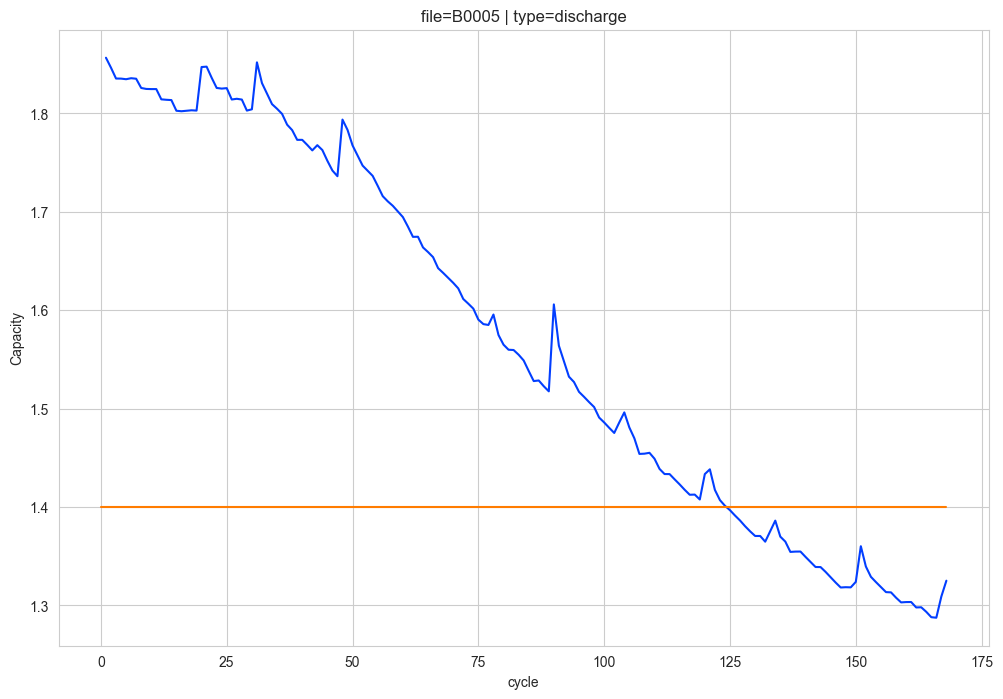

In [4]:
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
sns.set_style("whitegrid")
#deep, muted, pastel, bright, dark, colorblind
sns.set_palette('bright')
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('file=B0005 | type=discharge')

In [5]:
attrib=['cycle', 'date_time', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SOH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle           date_time  capacity       SOH
0      1 2008-04-02 15:25:41  1.856487  1.000000
1      2 2008-04-02 19:43:48  1.846327  0.994527
2      3 2008-04-03 00:01:06  1.835349  0.988614
3      4 2008-04-03 04:16:37  1.835263  0.988567
4      5 2008-04-03 08:33:25  1.834646  0.988235


In [6]:
dis_ele.describe()

,cycle,capacity,SOH
count,168.000000,168.000000,168.000000
mean,84.500000,1.572502,0.847031
std,48.641546,0.190413,0.102566
min,1.000000,1.287453,0.693488
25%,42.750000,1.390021,0.748737
50%,84.500000,1.557085,0.838727
75%,126.250000,1.769163,0.952962
max,168.000000,1.856487,1.000000


Text(0.5, 1.0, 'file=B0005 | type=discharge')

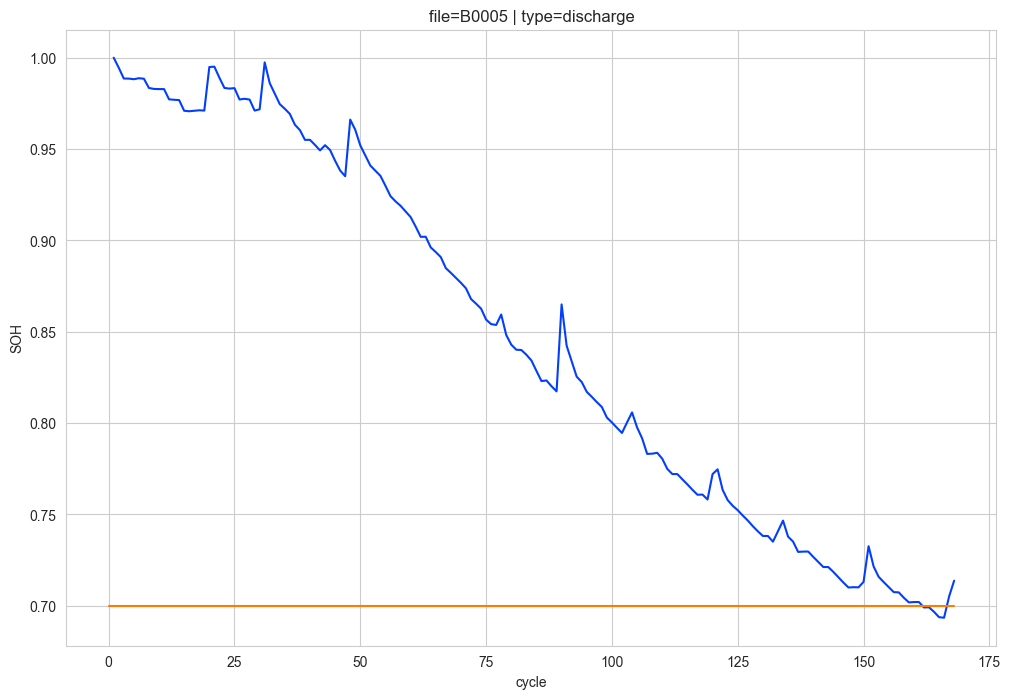

In [7]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SOH']]
sns.set_style("whitegrid")
#deep, muted, pastel, bright, dark, colorblind
sns.set_palette('bright')
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['SOH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('file=B0005 | type=discharge')

In [8]:
C = dataset['capacity'][0]
soh = []
for i in range(len(dataset)):
  soh.append([dataset['capacity'][i] / C])
soh = pd.DataFrame(data=soh, columns=['SOH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
train_dataset = dataset[attribs]
print(train_dataset)

sc = MinMaxScaler(feature_range=(0,1))
train_dataset = sc.fit_transform(train_dataset)
print(soh.shape)

       capacity  voltage_measured  current_measured  temperature_measured  \
0      1.856487          4.191492         -0.004902             24.330034   
1      1.856487          4.190749         -0.001478             24.325993   
2      1.856487          3.974871         -2.012528             24.389085   
3      1.856487          3.951717         -2.013979             24.544752   
4      1.856487          3.934352         -2.011144             24.731385   
...         ...               ...               ...                   ...   
50280  1.325079          3.579262         -0.001569             34.864823   
50281  1.325079          3.581964         -0.003067             34.814770   
50282  1.325079          3.584484         -0.003079             34.676258   
50283  1.325079          3.587336          0.001219             34.565580   
50284  1.325079          3.589937         -0.000583             34.405920   

       current_load  voltage_load      time  
0           -0.0006         0

ADAM optimizer

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam


## LSTM-Based Modeling

In [10]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=train_dataset.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1))
model.summary()
model.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_absolute_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


Train Model

In [11]:
model.fit(x=train_dataset, y=soh.to_numpy(), batch_size=25, epochs=50)

Epoch 1/50
2012/2012 [==============================] - 2s 637us/step - loss: 0.1133
Epoch 2/50
2012/2012 [==============================] - 1s 608us/step - loss: 0.0336
Epoch 3/50
2012/2012 [==============================] - 1s 621us/step - loss: 0.0326
Epoch 4/50
2012/2012 [==============================] - 1s 606us/step - loss: 0.0324
Epoch 5/50
2012/2012 [==============================] - 1s 604us/step - loss: 0.0326
Epoch 6/50
2012/2012 [==============================] - 1s 641us/step - loss: 0.0327
Epoch 7/50
2012/2012 [==============================] - 1s 634us/step - loss: 0.0326
Epoch 8/50
2012/2012 [==============================] - 1s 605us/step - loss: 0.0324
Epoch 9/50
2012/2012 [==============================] - 1s 613us/step - loss: 0.0324
Epoch 10/50
2012/2012 [==============================] - 1s 697us/step - loss: 0.0324
Epoch 11/50
2012/2012 [==============================] - 1s 622us/step - loss: 0.0321
Epoch 12/50
2012/2012 [==============================] - 1s 617

## Test Model SoH Prediction
B0006

In [12]:
dataset_val, capacity_val = load_data('B0006')
attrib=['cycle', 'date_time', 'capacity']
dis_ele = capacity_val[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SOH']=(dis_ele['capacity']) / C
print(dataset_val.head(5))
print(dis_ele.head(5))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 2.035337591005598, 4.179799607333447, -0.0023663271409738672, 24.277567510331888, -0.0006, 0.0, 0.0]
   cycle  ambient_temperature           date_time  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  2.035338          4.179800   
1      1                   24 2008-04-02 15:25:41  2.035338          4.179823   
2      1                   24 2008-04-02 15:25:41  2.035338          3.966528   
3      1                   24 2008-04-02 15:25:41  2.035338          3.945886   
4      1                   24 2008-04-02 15:25:41  2.035338          3.930354   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.002366             24.277568       -0.0006         0.000   0.000  
1          0.000434             24.277073       -0.0006         4.195  16.781  
2         -2.014242             24.366226       -1.9990         3.070  35.703  
3         -2.

In [13]:
attrib=['capacity', 'voltage_measured', 'current_measured',
        'temperature_measured', 'current_load', 'voltage_load', 'time']
soh_pred = model.predict(sc.fit_transform(dataset_val[attrib]))
print(soh_pred.shape)

C = dataset_val['capacity'][0]
soh = []
for i in range(len(dataset_val)):
  soh.append(dataset_val['capacity'][i] / C)
new_soh = dataset_val.loc[(dataset_val['cycle'] >= 1), ['cycle']]
new_soh['SOH'] =  soh
new_soh['NewSOH'] = soh_pred
new_soh = new_soh.groupby(['cycle']).mean().reset_index()
print(new_soh.head(10))
rms = np.sqrt(mean_squared_error(new_soh['SOH'], new_soh['NewSOH']))
print('Root Mean Square Error: ', rms)

1572/1572 [==============================] - 5s 3ms/step
(50285, 1)
   cycle       SOH    NewSOH
0      1  1.000000  0.933114
1      2  0.994990  0.930456
2      3  0.989185  0.927404
3      4  0.989165  0.927410
4      5  0.982898  0.924101
5      6  0.989467  0.927577
6      7  0.989075  0.927360
7      8  0.967304  0.915832
8      9  0.966997  0.915677
9     10  0.961625  0.912839
Root Mean Square Error:  0.07787041942380994


In [14]:
# Cycle에 따른 보정값을 적용하는 함수
def apply_cycle_correction(soh_pred, cycles, slope=-0.0013, intercept=0.055):
    """
    Cycle에 따라 보정값을 추가하여 예측된 SOH에 적용합니다.
    Args:
        soh_pred: 모델이 예측한 SOH 값 배열
        cycles: 각 예측 값에 해당하는 Cycle 값 배열
        slope: Cycle 보정의 기울기 (Cycle이 증가함에 따라 보정값이 감소)
        intercept: 보정값의 초기값
    Returns:
        보정된 예측 SOH 값 배열
    """
    # 보정값 계산
    corrections = slope * cycles + intercept
    # 예측값에 보정값 적용
    corrected_soh_pred = soh_pred.flatten() + corrections
    return corrected_soh_pred

# Cycle에 따른 보정값 적용
new_soh['CorrectedNewSOH'] = apply_cycle_correction(new_soh['NewSOH'].values, new_soh['cycle'].values)

# 결과 확인
print(new_soh.head(10))

# 보정 후 RMSE 재계산
corrected_rms = np.sqrt(mean_squared_error(new_soh['SOH'], new_soh['CorrectedNewSOH']))
print('Corrected Root Mean Square Error: ', corrected_rms)

   cycle       SOH    NewSOH  CorrectedNewSOH
0      1  1.000000  0.933114         0.986814
1      2  0.994990  0.930456         0.982856
2      3  0.989185  0.927404         0.978504
3      4  0.989165  0.927410         0.977210
4      5  0.982898  0.924101         0.972601
5      6  0.989467  0.927577         0.974777
6      7  0.989075  0.927360         0.973260
7      8  0.967304  0.915832         0.960432
8      9  0.966997  0.915677         0.958977
9     10  0.961625  0.912839         0.954839
Corrected Root Mean Square Error:  0.013128314572846208


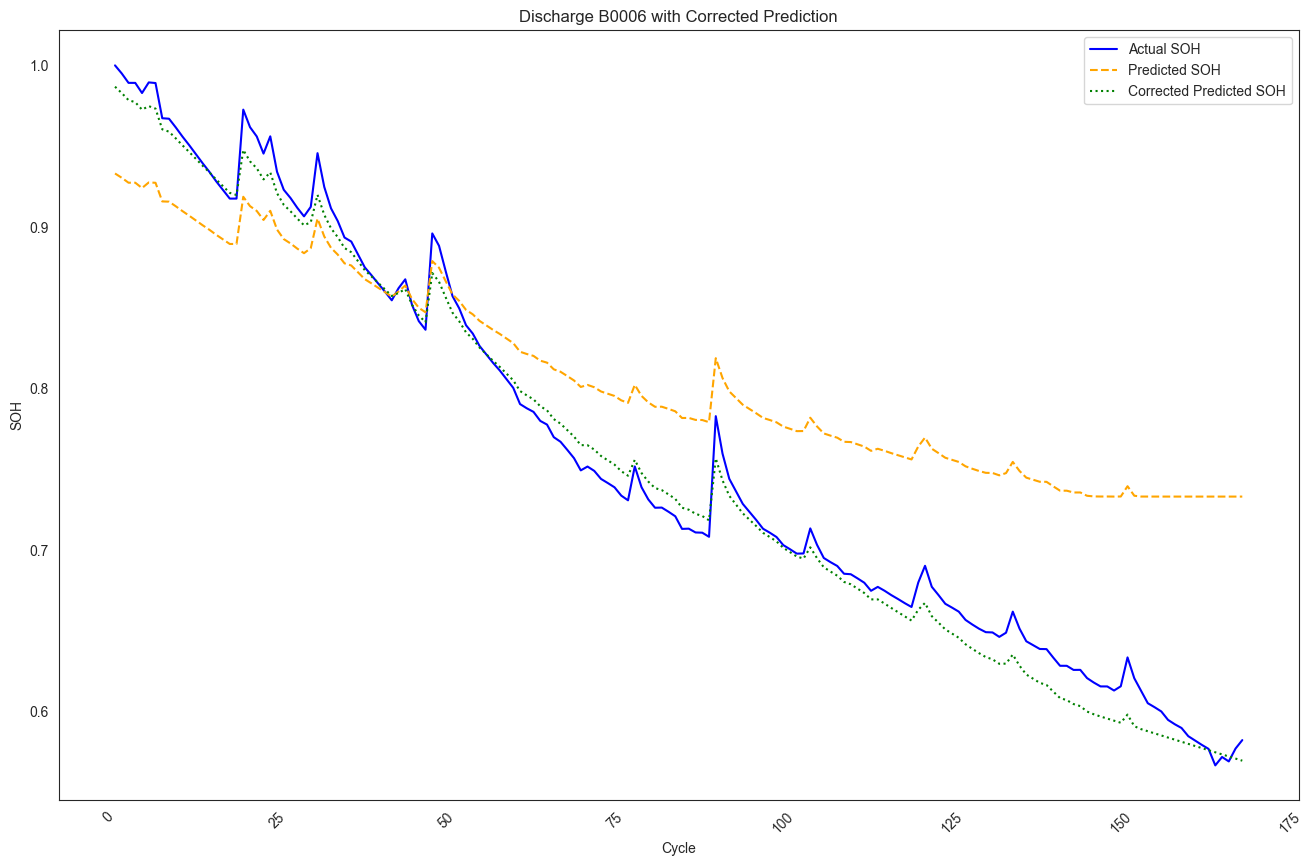

In [15]:
# plot_df에 CorrectedNewSOH 열 추가
plot_df = new_soh.loc[(new_soh['cycle'] >= 1), ['cycle', 'SOH', 'NewSOH', 'CorrectedNewSOH']]

# 시각화 스타일 설정 및 크기 지정
sns.set_style("white")
plt.figure(figsize=(16, 10))

# 실제 SOH와 예측 SOH, 보정된 예측 SOH를 차트에 그리기
plt.plot(plot_df['cycle'], plot_df['SOH'], label='Actual SOH', color='blue')
plt.plot(plot_df['cycle'], plot_df['NewSOH'], label='Predicted SOH', color='orange', linestyle='--')
plt.plot(plot_df['cycle'], plot_df['CorrectedNewSOH'], label='Corrected Predicted SOH', color='green', linestyle=':')


# 축 및 제목 설정
plt.ylabel('SOH')
plt.xlabel('Cycle')
plt.title('Discharge B0006 with Corrected Prediction')

# 범례 추가 및 x축 레이블 간격 조정
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [16]:
dataset_val, capacity_val = load_data('B0005')
attrib=['cycle', 'date_time', 'capacity']
dis_ele = capacity_val[attrib]

rows=['cycle','capacity']
dataset=dis_ele[rows]

data_train=dataset[(dataset['cycle']<50)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=50)]
data_set_test=data_test.iloc[:,1:2].values

sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
#take the last 10t to predict 10t+1
for i in range(10,49):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

print(X_train)

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]
[[[1.        ]
  [0.91561044]
  [0.8244276 ]
  [0.82370776]
  [0.81858284]
  [0.82702292]
  [0.82274107]
  [0.74475387]
  [0.73658968]
  [0.73525587]]

 [[0.91561044]
  [0.8244276 ]
  [0.82370776]
  [0.81858284]
  [0.82702292]
  [0.82274107]
  [0.74475387]
  [0.73658968]
  [0.73525587]
  [0.73530807]]

 [[0.8244276 ]
  [0.82370776]
  [0.81858284]
  [0.82702292]
  [0.82274107]
  [0.74475387]
  [0.73658968]
  [0.73525587]
  [0.73530807]
  [0.64878019]]

 [[0.82370776]
  [0.81858284]
  [0.82702292]
  [0.82274107]
  [0.74475387]
  [0.73658968]
  [0.73525587]
  [0.73530807]
  [0.64878019]
  [0.64504437]]

 [[0.81858284]
  [0.82702292]
  [0.82274107]
  [0.74475387]
  [0.73658968]
  [0.73525587]
  [0.73530807]
  [0.64878019]
  [0.64504437]
  [0.64245569]]

 [[0.82702292]
  [0.82274107]
  [0.74475387]
  [0.73658968]


In [17]:
regress = Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200))
regress.add(Dropout(0.3))
regress.add(Dense(units=1))
regress.compile(optimizer='adam',loss='mean_squared_error')
regress.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 200)           161600    
                                                                 
 dropout_1 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 200)           320800    
                                                                 
 dropout_2 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 200)           320800    
                                                                 
 dropout_3 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_3 (LSTM)               (None, 200)              

In [18]:
regress.fit(X_train,y_train,epochs=200,batch_size=25)

Epoch 1/200
2/2 [==============================] - 12s 169ms/step - loss: 0.3102
Epoch 2/200
2/2 [==============================] - 0s 67ms/step - loss: 0.1026
Epoch 3/200
2/2 [==============================] - 0s 82ms/step - loss: 0.1698
Epoch 4/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0535
Epoch 5/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0968
Epoch 6/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0910
Epoch 7/200
2/2 [==============================] - 0s 65ms/step - loss: 0.0654
Epoch 8/200
2/2 [==============================] - 0s 81ms/step - loss: 0.0400
Epoch 9/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0539
Epoch 10/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0556
Epoch 11/200
2/2 [==============================] - 0s 81ms/step - loss: 0.0430
Epoch 12/200
2/2 [==============================] - 0s 83ms/step - loss: 0.0454
Epoch 13/200
2/2 [=============================

2/2 [==============================] - 0s 56ms/step - loss: 0.0315
Epoch 104/200
2/2 [==============================] - 0s 66ms/step - loss: 0.0384
Epoch 105/200
2/2 [==============================] - 0s 75ms/step - loss: 0.0336
Epoch 106/200
2/2 [==============================] - 0s 88ms/step - loss: 0.0341
Epoch 107/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0336
Epoch 108/200
2/2 [==============================] - 0s 82ms/step - loss: 0.0366
Epoch 109/200
2/2 [==============================] - 0s 83ms/step - loss: 0.0349
Epoch 110/200
2/2 [==============================] - 0s 62ms/step - loss: 0.0325
Epoch 111/200
2/2 [==============================] - 0s 74ms/step - loss: 0.0353
Epoch 112/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0387
Epoch 113/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0317
Epoch 114/200
2/2 [==============================] - 0s 65ms/step - loss: 0.0355
Epoch 115/200
2/2 [=======================

In [19]:
print(len(data_test))
data_total=pd.concat((data_train['capacity'], data_test['capacity']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

119


In [20]:
X_test=[]
for i in range(10,129):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred=regress.predict(X_test)
print(pred.shape)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test RMSE: %.3f' % rmse)
metrics.r2_score(tests,pred)

4/4 [==============================] - 3s 83ms/step
(119, 1)
Test RMSE: 0.031


0.9460511623942063

In [21]:
def correction(pred, cycles, slope=-0.0007, intercept=0.02):
    """
    Cycle에 따라 보정값을 추가하여 예측된 Capacity에 적용합니다.
    Args:
        pred: 모델이 예측한 SOH 값 배열
        cycles: 각 예측 값에 해당하는 Cycle 값 배열
        slope: Cycle 보정의 기울기 (Cycle이 증가함에 따라 보정값이 감소)
        intercept: 보정값의 초기값
    Returns:
        보정된 예측 SOH 값 배열
    """
    # 보정값 계산
    corrections = slope * cycles + intercept
    # 예측값에 보정값 적용
    corrected_pred = pred + corrections
    return corrected_pred
# Cycle에 따른 보정값 적용

data_test = data_test.copy()  # 원본 데이터가 변경되지 않도록 복사본 사용
data_test['cycle'] = data_test.index  # Cycle 값을 설정 (예시 값)

# 보정된 예측값 계산
corrected_pred = correction(pred, data_test['cycle'].values)

# RMSE와 R^2 계산
corrected_rmse = np.sqrt(mean_squared_error(tests, corrected_pred))
print('Corrected Test RMSE: %.3f' % corrected_rmse)

corrected_r2 = metrics.r2_score(tests, corrected_pred)
print('Corrected R^2 Score: %.3f' % corrected_r2)

# 결과 확인 및 보정된 예측값 추가
data_test.loc[:, 'Corrected'] = corrected_pred
print(data_test[['capacity', 'Corrected']].head(10))



Corrected Test RMSE: 0.052
Corrected R^2 Score: 0.854
    capacity  Corrected
49  1.767364   1.750526
50  1.757018   1.756488
51  1.746871   1.756446
52  1.741717   1.750883
53  1.736423   1.742468
54  1.726322   1.733998
55  1.715807   1.726343
56  1.710533   1.719306
57  1.706014   1.713091
58  1.700311   1.706248


Text(0.5, 1.0, 'file=B0005 | type=discharge -RULe=-8, window-size=10')

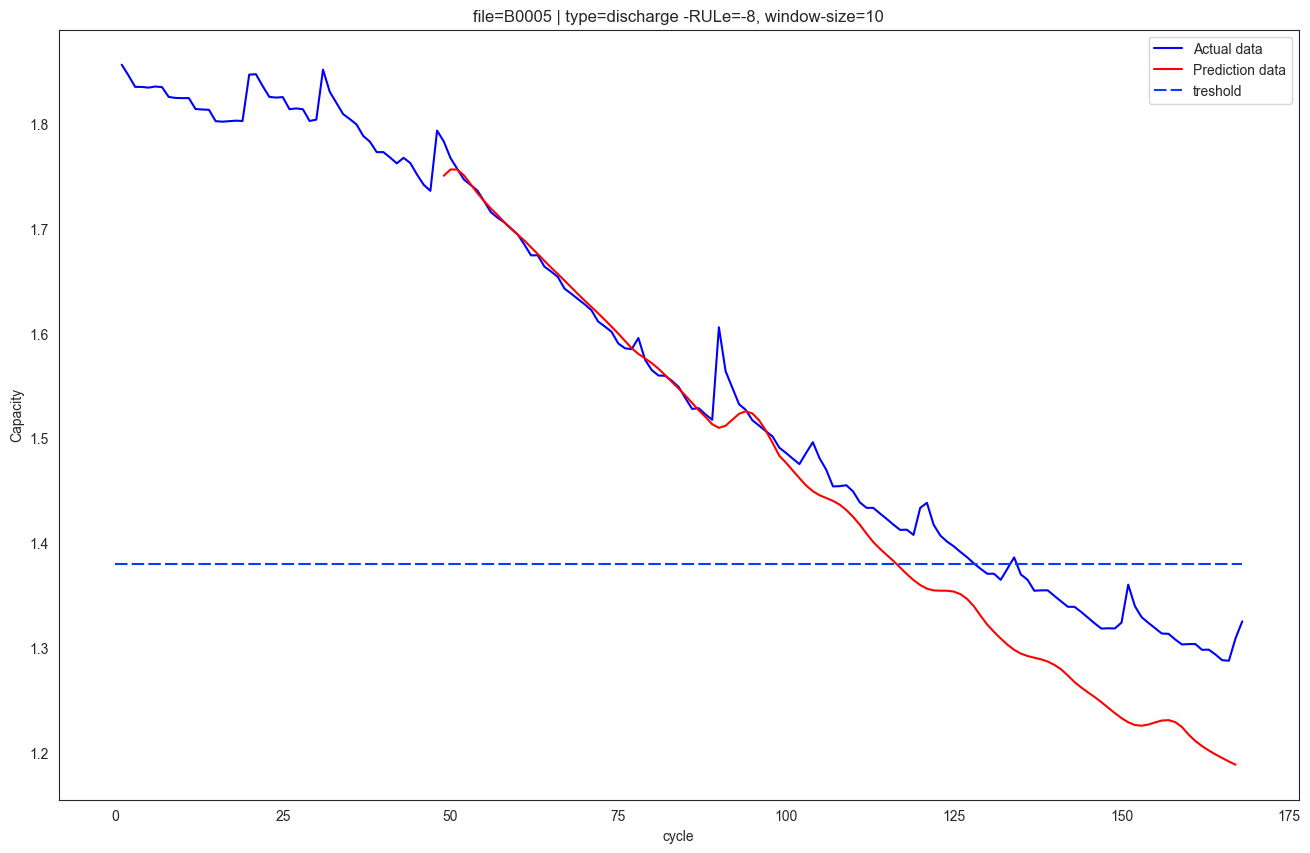

In [22]:
ln = len(data_train)
data_test['pre']=pred
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','capacity']]
plot_per = data_test.loc[(data_test['cycle']>=ln),['cycle','Corrected']]
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['Corrected'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('file=B0005 | type=discharge -RULe=-8, window-size=10')

In [23]:
pred=0
Afil=0
Pfil=0
a=data_test['capacity'].values
b=data_test['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break
print("Actual Fail at Cycle Number: "+ str(Afil+ln))
print("Prediction Fail at Cycle Number: "+ str(Pfil+ln))
RULerror=Pfil-Afil
print("Error of RUL= "+ str(RULerror)+ " Cycles")

Actual Fail at Cycle Number: 128
Prediction Fail at Cycle Number: 133
Error of RUL= 5 Cycles
